# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler
import seaborn as sns
import sklearn
import keras
%matplotlib inline

Using TensorFlow backend.


# 2. Importing Data

In [2]:
df = pd.read_csv('AAPL (1).csv')
data = pd.read_csv('News_Apple_Reddit2.csv', encoding = "ISO-8859-1")

# 3. Univariate Analysis

In [3]:
df = df.sort_values('Date')

In [4]:
#Converting to date time
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Date'].iloc[164]

Timestamp('2011-08-25 00:00:00')

In [6]:
df = df.iloc[164:,]

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
164,2011-08-25,52.154285,53.635715,52.142857,53.388573,36.141747,217836500
165,2011-08-26,53.024284,54.828571,52.971428,54.797142,37.095287,160369300
166,2011-08-29,55.454285,55.928570,55.428570,55.709999,37.713242,101317300
167,2011-08-30,55.464287,55.977142,55.172855,55.712856,37.715183,104480600
168,2011-08-31,55.795715,56.011429,54.551430,54.975716,37.216175,130646600


In [9]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].astype(str).astype(float).astype(int)


In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
164,2011-08-25,52,53,52,53,36,217836500
165,2011-08-26,53,54,52,54,37,160369300
166,2011-08-29,55,55,55,55,37,101317300
167,2011-08-30,55,55,55,55,37,104480600
168,2011-08-31,55,56,54,54,37,130646600


# 4. Technical Analysis

# 4.1. Simple Moving Average

In [11]:
#1. Simple Moving Averdf
df['sma30'] = df.Close.rolling(window = 30).mean()
df['sma40'] = df.Close.rolling(window = 40).mean()
df['sma50'] = df.Close.rolling(window = 50).mean()

# 4.2. Exponential Moving Average

In [12]:
#2. Exponential Moving Average

df['ewm30'] = df['Close'].ewm(span=30, adjust=False).mean()
df['ewm40'] = df['Close'].ewm(span=40, adjust=False).mean()
df['ewm50'] = df['Close'].ewm(span=50, adjust=False).mean()

# 4.3. RSI

In [13]:
#RSI
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
         pd.stats.moments.ewma(d, com=period-1, adjust=False)
    return 100 - 100 / (1 + rs)
df['RSI'] = RSI(df['Open'], 14)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=13,min_periods=0,adjust=False,ignore_na=False).mean()
  if sys.path[0] == '':


# 4.4. Bollinger Bands

In [14]:
#Bollinger Bands

def bbands(price, length, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    #sd = pd.stats.moments.rolling_std(price,length)
    #upband = ave + (sd*numsd)
    #dnband = ave - (sd*numsd)
    return np.round(ave,3) #np.round(upband,3), np.round(dnband,3)
df['bbands30'] = bbands(df.Close, 30)
df['bbands40'] = bbands(df.Close, 40)
df['bbands50'] = bbands(df.Close, 50)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()
  """
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


# 4.5. Stochastic Oscillator 

In [15]:
#Stochastic Oscillator and Stochastic momentum Indicator

def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

In [16]:
df['STOK'] = STOK(df.Close, df.Low, df.High, 3) 

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).min()
  after removing the cwd from sys.path.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).max()
  after removing the cwd from sys.path.


# 6.Stochastic momentum Indicator

In [17]:
def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD



In [18]:
df['STOD'] = STOD(df.Close, df.Low, df.High, 3) 

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).min()
  
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).max()
  
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


# 7.Commodity Channel Index

In [19]:
#Commodity Channel Index
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI') 
 #data = data.join(CCI) 
 #return data
 return CCI


In [20]:
df['CCI30'] = CCI(df, 30)
df['CCI40'] = CCI(df, 30)
df['CCI50'] = CCI(df, 30)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  after removing the cwd from sys.path.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  after removing the cwd from sys.path.


# 8.Trend Detection Index

In [21]:
#Trend Detection Index

# 9.Rate of Price Change

In [22]:
#Rate of Price Change
df['Rate_Return30'] = df['Close'].pct_change(periods = 30) 
df['Rate_Return40'] = df['Close'].pct_change(periods = 40) 
df['Rate_Return50'] = df['Close'].pct_change(periods = 50) 

# 10.Rate of Volume Change

In [23]:
#Rate of Volume Change
df['Rate_Return_volume30'] = df['Volume'].pct_change(periods = 30) 
df['Rate_Return_volume40'] = df['Volume'].pct_change(periods = 40) 
df['Rate_Return_volume50'] = df['Volume'].pct_change(periods = 50)

# 11. William % R

In [24]:
#William % R 

def WILLR(h, l, c, n):
    hh = pd.rolling_max(h, n, min_periods=1)
    ll = pd.rolling_min(l, n, min_periods=1)
    spread = hh - ll
    willr = np.select([spread != 0.], [100 * (hh - c) / spread], default=0.)
    return willr


In [25]:
df['WILLR30'] = WILLR(df.High, df.Low, df.Close, 30)
df['WILLR40'] = WILLR(df.High, df.Low, df.Close, 40)
df['WILLR50'] = WILLR(df.High, df.Low, df.Close, 50)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,min_periods=1,center=False).max()
  after removing the cwd from sys.path.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,min_periods=1,center=False).min()
  """
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,min_periods=1,center=False).max()
  after removing the cwd from sys.path.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: p

# Feature Engineering

# 1. Difference between Close and Open

In [26]:
#The difference between Close and Open
df['difference'] = df['Close'] - df['Open']
df['diff_hal'] = df['High'] - df['Low']

# 2.Addition of Strandard Deviation

In [27]:
#Addition of Strandard Deviation
df['st_dev'] = df['Close'].rolling(5).std()

# 3. Rate of Changing of Price

In [28]:
#Wheather the price is increasing or not
df['Price_Rise'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# 4. Removing NULL values

In [29]:
df.isnull().sum()

Date                     0
Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
sma30                   29
sma40                   39
sma50                   49
ewm30                    0
ewm40                    0
ewm50                    0
RSI                     14
bbands30                29
bbands40                39
bbands50                49
STOK                     3
STOD                     7
CCI30                   29
CCI40                   29
CCI50                   29
Rate_Return30           30
Rate_Return40           40
Rate_Return50           50
Rate_Return_volume30    30
Rate_Return_volume40    40
Rate_Return_volume50    50
WILLR30                  0
WILLR40                  0
WILLR50                  0
difference               0
diff_hal                 0
st_dev                   4
Price_Rise               0
dtype: int64

In [30]:
df.dropna(inplace = True)

In [31]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
sma30                   0
sma40                   0
sma50                   0
ewm30                   0
ewm40                   0
ewm50                   0
RSI                     0
bbands30                0
bbands40                0
bbands50                0
STOK                    0
STOD                    0
CCI30                   0
CCI40                   0
CCI50                   0
Rate_Return30           0
Rate_Return40           0
Rate_Return50           0
Rate_Return_volume30    0
Rate_Return_volume40    0
Rate_Return_volume50    0
WILLR30                 0
WILLR40                 0
WILLR50                 0
difference              0
diff_hal                0
st_dev                  0
Price_Rise              0
dtype: int64

# Fundamental Analysis

In [32]:
data.head(1)

,body_x,score_x,title_x,url_x,date,body_y,score_y,title_y,url_y,body,score,title,url
0,NaN,1614,Apple's Steve Jobs says resigns as CEO,http://www.reuters.com/,2011-08-25,\r\n\r\nWelcome to the daily Tech Support thre...,1.0,Daily Tech Support Thread [April 15],https://www.reddit.com/r/apple/comments/8cfqin...,NaN,NaN,NaN,NaN


In [33]:
#renaming the columns for making our job simple 
data.columns = ['body1', 'score1', 'title1', 'url1', 'date', 'body2', 'score2',
       'title2', 'url2', 'body3', 'score3', 'title3', 'url3']

In [34]:
#filling the Null values with Unknown
data[['body1', 'body2', 'body3']] = data[['body1', 'body2', 'body3']].fillna('Unknown', axis =1)

In [35]:
#filling NULL values with unknown
data[['title1', 'title2', 'title3']] = data[['title1', 'title2', 'title3']].fillna('Unknown', axis =1)

In [36]:
#filling NULL values with unknown
data[['url1', 'url2', 'url3']] = data[['url1', 'url2', 'url3']].fillna('Unknown', axis =1)

# Text Processing

In [37]:
#Creating a list for text analysis
cols = ['body1', 'title1', 'url1','body2', 'title2', 'url2','body3', 'title3', 'url3' ]

In [38]:
#removing all useless notions from the texr
for col in cols:
    data[col] = data[col].str.replace('[^a-zA-Z]', ' ')

In [39]:
#converting to lower
def function(x):
    return x.str.lower()

data = data.select_dtypes(include=['object']).apply(function)

In [40]:
#remvoin words whose length is less than 4
for col in cols:
    data[col] = data[col].str.findall('\w{3,}').str.join(' ')

In [41]:
data.sample()

,body1,title1,url1,date,body2,title2,url2,body3,title3,url3
750,unknown,airpods have the highest customer satisfaction...,https daringfireball net linked airpod survey,2017-05-02,iphone was stolen the weeks ago while was holi...,question about find iphone app,https www reddit com apple comments dnk questi...,iphone was stolen the weeks ago while was holi...,question about find iphone app,https www reddit com apple comments dnk questi...


In [42]:
#tokenizing using NLTK
import nltk
for col in cols:
    data[col] = data.apply(lambda row: nltk.word_tokenize(row[col]), axis=1)


In [43]:
#stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

for col in cols:
    data[col] = data[col].apply(lambda x: [stemmer.stem(y) for y in x])


In [44]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

for col in cols:
    data[col] = data[col].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))

# 2.2 Feature Engineering

In [45]:
#One hot Encoding using Keras
# integer encode the documents


from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding


vocab_size = 60

for col in cols:
    data[col] = [one_hot(d, vocab_size) for d in data[col]]


In [46]:
#Padding the the sequences for the same length using pad_sequence
from keras.preprocessing import sequence

maxlen = 1 #max of 60 sequences it can hold

for col in cols:
    data[col] = sequence.pad_sequences(data[col], maxlen=maxlen)

# Merging of two DataSets

In [47]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,sma30,sma40,sma50,...,Rate_Return_volume30,Rate_Return_volume40,Rate_Return_volume50,WILLR30,WILLR40,WILLR50,difference,diff_hal,st_dev,Price_Rise
214,2011-11-04,57,57,57,57,38,75557300,56.166667,56.250,55.80,...,-0.446748,-0.464904,-0.653147,30.0,30.0,30.0,0,0,0.547723,0
215,2011-11-07,57,57,56,57,38,67568900,56.166667,56.325,55.86,...,-0.667507,-0.422281,-0.578667,30.0,30.0,30.0,0,1,0.547723,1
216,2011-11-08,57,58,57,58,39,100110500,56.200000,56.425,55.92,...,-0.366888,-0.091062,-0.011911,20.0,20.0,20.0,1,1,0.707107,0
217,2011-11-09,56,57,56,56,38,139671000,56.200000,56.450,55.94,...,0.300361,0.044807,0.336813,40.0,40.0,40.0,0,1,0.707107,0
218,2011-11-10,56,56,54,55,37,186188100,56.200000,56.425,55.96,...,0.143860,0.782477,0.425128,50.0,50.0,50.0,-1,2,1.140175,0


In [48]:
data.head()

,body1,title1,url1,date,body2,title2,url2,body3,title3,url3
0,56,52,37,2011-08-25,47,31,31,56,56,56
1,56,24,53,2011-10-06,44,32,32,56,3,17
2,56,19,58,2011-11-13,56,21,8,56,56,56
3,56,3,45,2012-01-29,35,13,13,56,56,56
4,56,28,45,2012-03-27,31,8,7,56,56,56


In [49]:
data.columns

Index(['body1', 'title1', 'url1', 'date', 'body2', 'title2', 'url2', 'body3',
       'title3', 'url3'],
      dtype='object')

In [50]:
data.columns = ['body1', 'title1', 'url1', 'Date', 'body2', 'title2', 'url2', 'body3',
       'title3', 'url3']

In [51]:
df.shape

(1545, 35)

In [52]:
data.isnull().sum()

body1     0
title1    0
url1      0
Date      0
body2     0
title2    0
url2      0
body3     0
title3    0
url3      0
dtype: int64

In [53]:
data.head()

,body1,title1,url1,Date,body2,title2,url2,body3,title3,url3
0,56,52,37,2011-08-25,47,31,31,56,56,56
1,56,24,53,2011-10-06,44,32,32,56,3,17
2,56,19,58,2011-11-13,56,21,8,56,56,56
3,56,3,45,2012-01-29,35,13,13,56,56,56
4,56,28,45,2012-03-27,31,8,7,56,56,56


In [54]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,sma30,sma40,sma50,...,Rate_Return_volume30,Rate_Return_volume40,Rate_Return_volume50,WILLR30,WILLR40,WILLR50,difference,diff_hal,st_dev,Price_Rise
214,2011-11-04,57,57,57,57,38,75557300,56.166667,56.250,55.80,...,-0.446748,-0.464904,-0.653147,30.0,30.0,30.0,0,0,0.547723,0
215,2011-11-07,57,57,56,57,38,67568900,56.166667,56.325,55.86,...,-0.667507,-0.422281,-0.578667,30.0,30.0,30.0,0,1,0.547723,1
216,2011-11-08,57,58,57,58,39,100110500,56.200000,56.425,55.92,...,-0.366888,-0.091062,-0.011911,20.0,20.0,20.0,1,1,0.707107,0
217,2011-11-09,56,57,56,56,38,139671000,56.200000,56.450,55.94,...,0.300361,0.044807,0.336813,40.0,40.0,40.0,0,1,0.707107,0
218,2011-11-10,56,56,54,55,37,186188100,56.200000,56.425,55.96,...,0.143860,0.782477,0.425128,50.0,50.0,50.0,-1,2,1.140175,0


In [55]:
data['Date'] = pd.to_datetime(data['Date'])

In [56]:
#data has many duplicate values
#dropping duplicate calues

data2 = data.drop_duplicates('Date')

In [57]:
data.shape

(2338, 10)

In [58]:
data2.shape

(771, 10)

In [59]:
df.shape

(1545, 35)

In [60]:
final = pd.merge(df, data, on = 'Date', how = 'left')

In [61]:
final.shape

(2582, 44)

In [62]:
final.head()

,Date,Open,High,Low,Close,Adj Close,Volume,sma30,sma40,sma50,...,Price_Rise,body1,title1,url1,body2,title2,url2,body3,title3,url3
0,2011-11-04,57,57,57,57,38,75557300,56.166667,56.250,55.80,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-11-07,57,57,56,57,38,67568900,56.166667,56.325,55.86,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-11-08,57,58,57,58,39,100110500,56.200000,56.425,55.92,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-11-09,56,57,56,56,38,139671000,56.200000,56.450,55.94,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-11-10,56,56,54,55,37,186188100,56.200000,56.425,55.96,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
final.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,sma30,sma40,sma50,...,Price_Rise,body1,title1,url1,body2,title2,url2,body3,title3,url3
2577,2017-12-22,174,175,174,175,174,16349400,171.833333,171.450,168.58,...,0,28.0,23.0,42.0,3.0,58.0,57.0,56.0,4.0,55.0
2578,2017-12-26,170,171,169,170,169,33185500,171.700000,171.625,168.86,...,0,18.0,44.0,10.0,7.0,26.0,26.0,56.0,3.0,8.0
2579,2017-12-27,170,170,169,170,169,21498200,171.600000,171.725,169.08,...,1,56.0,47.0,14.0,7.0,36.0,49.0,56.0,7.0,31.0
2580,2017-12-28,171,171,170,171,170,16480200,171.600000,171.775,169.30,...,0,56.0,48.0,3.0,1.0,53.0,53.0,56.0,18.0,7.0
2581,2017-12-29,170,170,169,169,168,25999900,171.600000,171.850,169.50,...,0,56.0,3.0,48.0,2.0,2.0,32.0,56.0,4.0,4.0


In [64]:
#Once again Dropping Duplicate values in order to avoid confusion
final = final.drop_duplicates('Date')

In [65]:
final.shape

(1545, 44)

In [66]:
final.isnull().sum()

Date                       0
Open                       0
High                       0
Low                        0
Close                      0
Adj Close                  0
Volume                     0
sma30                      0
sma40                      0
sma50                      0
ewm30                      0
ewm40                      0
ewm50                      0
RSI                        0
bbands30                   0
bbands40                   0
bbands50                   0
STOK                       0
STOD                       0
CCI30                      0
CCI40                      0
CCI50                      0
Rate_Return30              0
Rate_Return40              0
Rate_Return50              0
Rate_Return_volume30       0
Rate_Return_volume40       0
Rate_Return_volume50       0
WILLR30                    0
WILLR40                    0
WILLR50                    0
difference                 0
diff_hal                   0
st_dev                     0
Price_Rise    

In [67]:
final.fillna(0, inplace = True)

# Test Train Split

In [68]:
#Splitting of test and train models

In [70]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'sma30',
       'sma40', 'sma50', 'ewm30', 'ewm40', 'ewm50', 'RSI', 'bbands30',
       'bbands40', 'bbands50', 'STOK', 'STOD', 'CCI30', 'CCI40', 'CCI50',
       'Rate_Return30', 'Rate_Return40', 'Rate_Return50',
       'Rate_Return_volume30', 'Rate_Return_volume40', 'Rate_Return_volume50',
       'WILLR30', 'WILLR40', 'WILLR50', 'difference', 'diff_hal', 'st_dev',
       'Price_Rise'],
      dtype='object')

In [120]:
final.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,sma30,sma40,sma50,...,Price_Rise,body1,title1,url1,body2,title2,url2,body3,title3,url3
0,2011-11-04,57,57,57,57,38,75557300,56.166667,56.25,55.8,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
X = final.drop(['difference','Open','Low', 'Date', 'High'], axis =1)

In [122]:
y = final['difference'].copy()

In [123]:
# X = df.iloc[:, 4:-1]
# y = df.iloc[:, -1]

In [124]:
X.head()

,Close,Adj Close,Volume,sma30,sma40,sma50,ewm30,ewm40,ewm50,RSI,...,Price_Rise,body1,title1,url1,body2,title2,url2,body3,title3,url3
0,57,38,75557300,56.166667,56.250,55.80,56.313715,56.047076,55.797111,52.734644,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,38,67568900,56.166667,56.325,55.86,56.357992,56.093560,55.844284,52.734644,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58,39,100110500,56.200000,56.425,55.92,56.463928,56.186557,55.928821,52.734644,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56,38,139671000,56.200000,56.450,55.94,56.433997,56.177457,55.931613,47.214757,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55,37,186188100,56.200000,56.425,55.96,56.341481,56.120020,55.895079,47.214757,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
y.head()

0    0
1    0
2    1
3    0
4   -1
Name: difference, dtype: int32

# Splitting

In [126]:
split = int(len(df)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [127]:
X_train.shape

(1236, 39)

In [128]:
X_test.shape

(309, 39)

In [129]:
y_train.shape

(1236,)

In [130]:
y_test.shape

(309,)

# Scalling

In [131]:
X_train.isnull().sum().sum()

0

In [132]:
#removing the infinate values
X_train = X_train.replace([np.inf, -np.inf], np.nan)

In [133]:
X_train.isnull().sum().sum()

0

In [134]:
X_test = X_test.replace([np.inf, -np.inf], np.nan)

In [135]:
X_test.isnull().sum().sum()

0

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [137]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [138]:
X_train[0]

array([-1.61574693, -1.57552579, -0.08457914, -1.63096598, -1.61794798,
       -1.63047872, -1.63454349, -1.64182465, -1.64832004, -0.0621823 ,
       -1.6309487 , -1.61794798, -1.63047872,  1.30741149,  0.52487326,
        0.13301051,  0.13301051,  0.13301051, -0.21861598,  0.40634052,
        0.30726078, -0.87595585, -0.79026287, -1.08583348, -0.40403123,
       -0.37926399, -0.35817606, -1.55330272, -0.91893557, -0.74085908,
       -0.4830152 , -0.4053684 , -0.43337461, -0.44801153, -0.41107693,
       -0.41151316, -0.46786026, -0.46016666, -0.4539531 ])

In [139]:
y_train[0:10]

0    0
1    0
2    1
3    0
4   -1
5   -1
6    0
7    1
8   -1
9   -1
Name: difference, dtype: int32

# Final Model

In [140]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [141]:
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [142]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers import Dropout

regressor=Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

#regressor.add(Flatten())
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error',metrics = ['accuracy'])

regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1236/1236 [==============================] - 17s 14ms/step - loss: 1.6908 - acc: 0.3835
Epoch 2/100
1236/1236 [==============================] - 9s 7ms/step - loss: 1.6675 - acc: 0.3794
Epoch 3/100
1236/1236 [==============================] - 10s 8ms/step - loss: 1.6376 - acc: 0.3746
Epoch 4/100
1236/1236 [==============================] - 9s 8ms/step - loss: 1.6463 - acc: 0.3819
Epoch 5/100
1236/1236 [==============================] - 9s 8ms/step - loss: 1.6284 - acc: 0.3794
Epoch 6/100
1236/1236 [==============================] - 10s 8ms/step - loss: 1.6180 - acc: 0.3835
Epoch 7/100
1236/1236 [==============================] - 9s 7ms/step - loss: 1.6300 - acc: 0.3859
Epoch 8/100
1236/1236 [==============================] - 9s 8ms/step - loss: 1.6268 - acc: 0.3851
Epoch 9/100
1236/1236 [==============================] - 9s 7ms/step - loss: 1.6184 - acc: 0.3819
Epoch 10/100
1236/1236 [==============================] - 9s 7ms/step - loss: 1.6208 - acc: 0.3762
Epoch 11/100
12

1236/1236 [==============================] - 9s 7ms/step - loss: 0.7878 - acc: 0.4838
Epoch 84/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.7238 - acc: 0.4927
Epoch 85/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.6787 - acc: 0.4984
Epoch 86/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.7147 - acc: 0.4887
Epoch 87/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.7408 - acc: 0.4919
Epoch 88/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.7070 - acc: 0.5000
Epoch 89/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.6833 - acc: 0.4887
Epoch 90/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.6817 - acc: 0.4927
Epoch 91/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.7006 - acc: 0.5016
Epoch 92/100
1236/1236 [==============================] - 9s 7ms/step - loss: 0.6156 - acc: 0.5032
Epoch 93/100
1236/1236 

In [113]:
y_pred = regressor.predict(X_test)
y_pred = (y_pred > 0.5)

In [114]:
df['y_pred'] = np.NaN
df.iloc[(len(df) - len(y_pred)):,-1:] = y_pred
trade_df = df.dropna()

In [115]:
trade_df['Tomorrows Returns'] = 0.
trade_df['Tomorrows Returns'] = np.log(trade_df['Close']/trade_df['Close'].shift(1))
trade_df['Tomorrows Returns'] = trade_df['Tomorrows Returns'].shift(-1)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [116]:
trade_df['Strategy Returns'] = 0.
trade_df['Strategy Returns'] = np.where(trade_df['y_pred'] == True, trade_df['Tomorrows Returns'], - trade_df['Tomorrows Returns'])

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
trade_df['Cumulative Market Returns'] = np.cumsum(trade_df['Tomorrows Returns'])
trade_df['Cumulative Strategy Returns'] = np.cumsum(trade_df['Strategy Returns'])

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


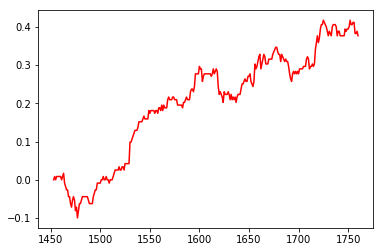

In [118]:
plt.plot(trade_df['Cumulative Market Returns'], color='r', label='Market Returns')


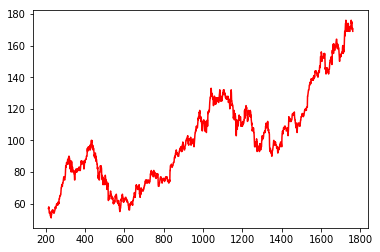

In [119]:
plt.plot(df['Close'], color='r', label='Market Returns')

# Alternate Model

In [150]:
X = df.iloc[:, 4:-1]
y = df.iloc[:, -1]

In [151]:
split = int(len(df)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [152]:
X_train.isnull().sum().sum()

0

In [153]:
#removing the infinate values
X_train = X_train.replace([np.inf, -np.inf], np.nan)

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [155]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [156]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers import Dropout

regressor=Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

#regressor.add(Flatten())
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error',metrics = ['accuracy'])

regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1236/1236 [==============================] - 15s 12ms/step - loss: nan - acc: 0.0000e+00
Epoch 2/100
1236/1236 [==============================] - 7s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 3/100
1236/1236 [==============================] - 7s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 4/100
1236/1236 [==============================] - 7s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 5/100
1236/1236 [==============================] - 7s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 6/100
1236/1236 [==============================] - 7s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 7/100
1236/1236 [==============================] - 8s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 8/100
1236/1236 [==============================] - 8s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 9/100
1236/1236 [==============================] - 8s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 10/100
 608/1236 [=============>................] - ETA: 3s - loss: nan - acc: 0.0000e+00

KeyboardInterrupt: 

# Alternate Models

In [183]:
df3 = pd.read_csv('AAPL.csv')


In [184]:
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,39.769264,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,39.982990,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,40.426876,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,40.849491,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,40.784698,98506100


In [167]:
split = int(len(df)*0.8)
train, test  = df[:split], df2[split:]

In [168]:
training_set=train.iloc[:,1:2].values

In [169]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [170]:
training_set_scaled.shape

(1236, 1)

In [171]:
X_train=[]
y_train=[]
for i in range(60,1236):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [172]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [173]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers import Dropout

regressor=Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

#regressor.add(Flatten())
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1176/1176 [==============================] - 26s 22ms/step - loss: 0.0346
Epoch 2/100
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0067
Epoch 3/100
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0068
Epoch 4/100
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0067
Epoch 5/100
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0055
Epoch 6/100
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0058
Epoch 7/100
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0056
Epoch 8/100
1176/1176 [==============================] - 16s 14ms/step - loss: 0.0055
Epoch 9/100
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0056
Epoch 10/100
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0057
Epoch 11/100
1176/1176 [==============================] - 15s 13ms/step - loss: 0.0047
Epoch 12/100
1176/1176 [============================

1176/1176 [==============================] - 15s 12ms/step - loss: 0.0018
Epoch 96/100
1176/1176 [==============================] - 16s 13ms/step - loss: 0.0018
Epoch 97/100
1176/1176 [==============================] - 16s 14ms/step - loss: 0.0018
Epoch 98/100
1176/1176 [==============================] - 15s 13ms/step - loss: 0.0019
Epoch 99/100
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0019
Epoch 100/100
1176/1176 [==============================] - 15s 12ms/step - loss: 0.0017


In [174]:
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([train['Open'],test['Open']],axis=0)

In [175]:
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [176]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [179]:
predicted_stock_price=regressor.predict(X_test)


In [181]:
print(predicted_stock_price)

[[73.0832  ]
 [73.41906 ]
 [73.75444 ]
 [73.71903 ]
 [73.41504 ]
 [73.07431 ]
 [72.80926 ]
 [72.762505]
 [72.92145 ]
 [73.06179 ]
 [72.951065]
 [72.74565 ]
 [72.552635]
 [72.43368 ]
 [72.51097 ]
 [72.83784 ]
 [73.23586 ]
 [73.376816]
 [73.203926]
 [72.82849 ]]


In [182]:
y_test

1453     True
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
1460    False
1461    False
1462    False
1463    False
1464     True
1465    False
1466    False
1467    False
1468    False
1469    False
1470    False
1471    False
1472    False
1473    False
1474     True
1475     True
1476    False
1477     True
1478    False
1479     True
1480     True
1481    False
1482     True
        ...  
1732    False
1733    False
1734    False
1735    False
1736    False
1737    False
1738    False
1739    False
1740    False
1741    False
1742    False
1743    False
1744    False
1745    False
1746    False
1747    False
1748    False
1749    False
1750    False
1751    False
1752    False
1753    False
1754    False
1755    False
1756    False
1757    False
1758    False
1759    False
1760    False
1761    False
Name: y_pred, Length: 309, dtype: object

In [ ]:
predicted_stock_price= sc.inverse_transform(predicted_stock_price)